In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
INPUT_GOOD_DIR = "good_data/"
INPUT_BROKEN_DIR = "broken_data/"

### 1. На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. 
Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб). 


Ссылка на мой датасет: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

### 2. В начале анализа следует привести общую характеристику набора данных: 
количество наблюдений, признаков, предметная область, содержание признаков,

характер целевой переменной,

задача обучения (регрессия, классификация, количество классов).

### О чем данный датасет?

    У нас есть данные о мобильных телефонах, нам необходимо определить категорию цены телефона, на основании признаков.

    Категория цены - диапазон от 0 до 3.

    Опираясь на остальные признаки можно провести анализ того, в какую категорию цены телефон попадет.

Чтение данных из датасета

In [3]:
train = pd.read_csv(INPUT_GOOD_DIR + "train.csv")
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
print(f"Размерность обучающего датасета: {train.shape}")

Размерность обучающего датасета: (2000, 21)


Описательная статистика

In [5]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Категории цен мобильных телефонов

In [6]:
train['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

Этот метод выводит информацию о фрейме данных, включая dtype индекса и столбцы, ненулевые значения

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Количество уникальных значений по каждому столбцу

In [8]:
train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

### Ломаем данные рандомно в соотношении 10 процентов от общего числа

In [9]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [11]:
if sum(train.isnull().sum()) == 0:
    print("NAN в исходном датасете отсутствуют")
else: 
    print("NAN в исходном датасете присутствуют")

NAN в исходном датасете отсутствуют


In [12]:
dataset_with_errors = train.copy(deep=True)
for i in range(train.shape[0]*10//100):
    drop_str = np.random.choice(train.shape[0], 1)
    drop_indexes = np.random.choice(train.shape[1]-1, 1)
    dataset_with_errors.iloc[drop_str,drop_indexes] = None
dataset_with_errors

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,NaN,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0


Показываем, что мы вписали NAN данные в датасет


In [13]:
dataset_with_errors.isnull().sum()

battery_power    11
blue              9
clock_speed      16
dual_sim          6
fc               11
four_g            6
int_memory       15
m_dep             3
mobile_wt         9
n_cores          10
pc                8
px_height        13
px_width         11
ram              17
sc_h             11
sc_w              7
talk_time         8
three_g          11
touch_screen     12
wifi              5
price_range       0
dtype: int64

### 3. Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:
1) исследование шкалы измерения каждого существенного признака;

2) построение эмпирического распределения каждого существенного признака;

3) анализ количества и распределения отсутствующих значений;

4) построение совместного распределения каждого признака и целевой переменной;

5) построение корреляционной матрицы.


#### Исследование шкалы измерения каждого существующего признака

In [14]:
dataset_with_errors.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1989.000000,1991.000000,1984.000000,1994.000000,1989.000000,1994.000000,1985.000000,1997.000000,1991.000000,1990.000000,...,1987.000000,1989.000000,1983.000000,1989.000000,1993.000000,1992.000000,1989.000000,1988.000000,1995.000000,2000.000000
mean,1238.343891,0.495229,1.520867,0.510030,4.299648,0.521565,31.996977,0.501953,140.200904,4.524623,...,644.120282,1251.928105,2125.098336,12.308698,5.769694,11.011546,0.762695,0.503018,0.507268,1.500000
std,439.621600,0.500103,0.816316,0.500025,4.334911,0.499660,18.158187,0.288579,35.408426,2.288219,...,444.067615,432.580030,1084.453955,4.211490,4.355286,5.463579,0.425538,0.500117,0.500073,1.118314
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,852.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,281.500000,874.000000,1208.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1225.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,563.000000,1248.000000,2147.000000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.000000,1.000000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,945.500000,1633.000000,3067.000000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Этот метод используется для получения сводки числовых значений в вашем наборе данных 

Он вычисляет среднее значение, стандартное отклонение, минимальное значение, максимальное значение, 1-й процентиль, 2-й процентиль, 3-й процентиль столбцов с числовыми значениями. 

Сводка числовых значений отображается по 8 признакам 

К примеру: среднее кол-во памяти = 32.077000 гб, минимальная память = 2 гб, а максимальная = 64 гб.

Медиана

In [15]:
dataset_with_errors.median()

battery_power    1225.0
blue                0.0
clock_speed         1.5
dual_sim            1.0
fc                  3.0
four_g              1.0
int_memory         32.0
m_dep               0.5
mobile_wt         141.0
n_cores             4.0
pc                 10.0
px_height         563.0
px_width         1248.0
ram              2147.0
sc_h               12.0
sc_w                5.0
talk_time          11.0
three_g             1.0
touch_screen        1.0
wifi                1.0
price_range         1.5
dtype: float64

#### Построение эмпирического распределения каждого существенного признака;

    Ось x - значения

    Ось y - частота повторов значений

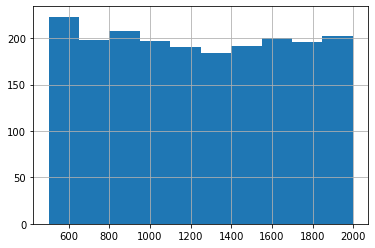

In [16]:
h = dataset_with_errors["battery_power"].hist()
fig = h.get_figure()

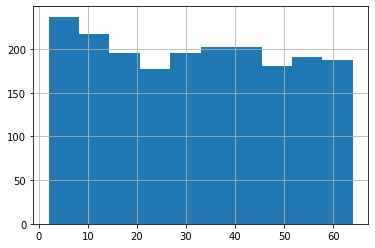

In [17]:
h = dataset_with_errors['int_memory'].hist()
fig = h.get_figure()

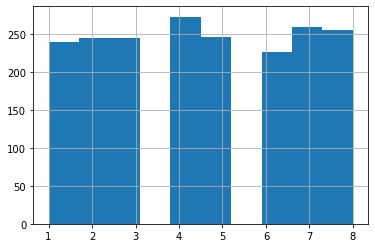

In [18]:
h = dataset_with_errors['n_cores'].hist()
fig = h.get_figure()

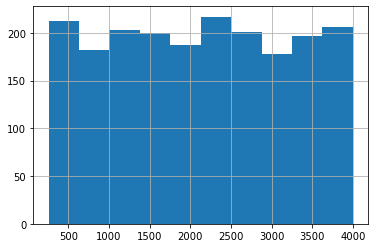

In [19]:
h = dataset_with_errors['ram'].hist()
fig = h.get_figure()

#### Анализ количества и распределения отсутствующих значений;

Выводим все отсутствующие значения

In [20]:
dataset_with_errors.isnull().sum()

battery_power    11
blue              9
clock_speed      16
dual_sim          6
fc               11
four_g            6
int_memory       15
m_dep             3
mobile_wt         9
n_cores          10
pc                8
px_height        13
px_width         11
ram              17
sc_h             11
sc_w              7
talk_time         8
three_g          11
touch_screen     12
wifi              5
price_range       0
dtype: int64

Общее число отсутствующих значений

In [21]:
sum(dataset_with_errors.isnull().sum())

199

In [22]:
filtered_data = dataset_with_errors[~np.isnan(dataset_with_errors)]
filtered_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,NaN,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0


Строим график для того, чтобы наглядно показать количество NAN значений в каждом признаке

Text(0.5, 1.0, 'График количества NAN значений в каждом признаке')

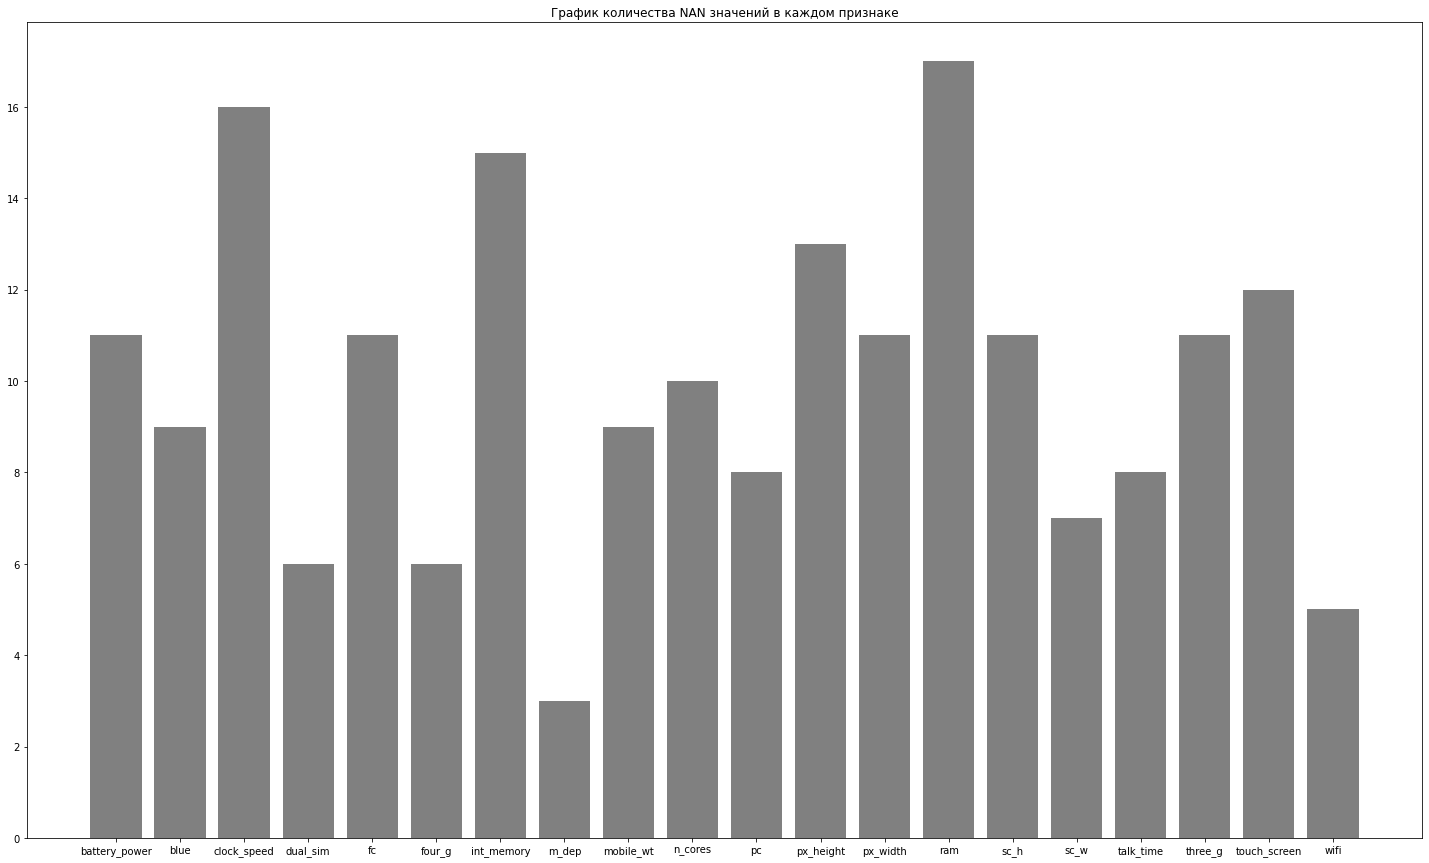

In [23]:
plt.figure(figsize=(25, 15))

data_col =  filtered_data.drop(labels=["price_range"], axis=1).columns

null_values = filtered_data.isnull().sum()[:-1]

plt.bar(data_col, null_values, color = "grey")
plt.title("График количества NAN значений в каждом признаке")

In [24]:
dataset_with_errors.nunique()

battery_power    1091
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1134
px_width         1107
ram              1555
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

Так как у некоторых признаков кол-во уникальных значений слишком большое, то график распределения признака будет не читаем

Поэтому отберем только те признаки, где кол-во уникальных значений <= 30 или 40

#### Построение совместного распределения каждого признака и целевой переменной

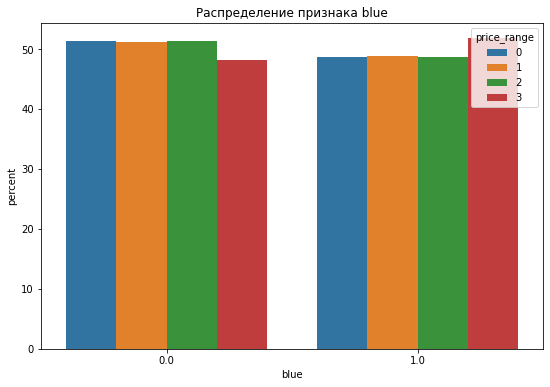

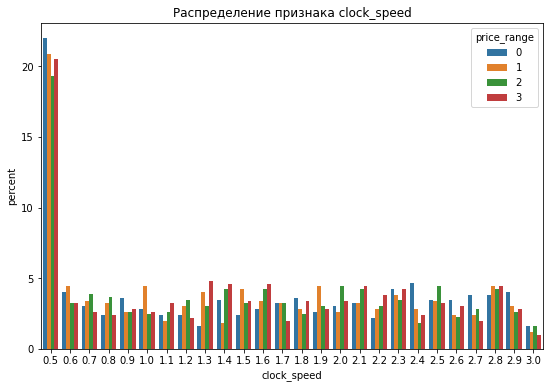

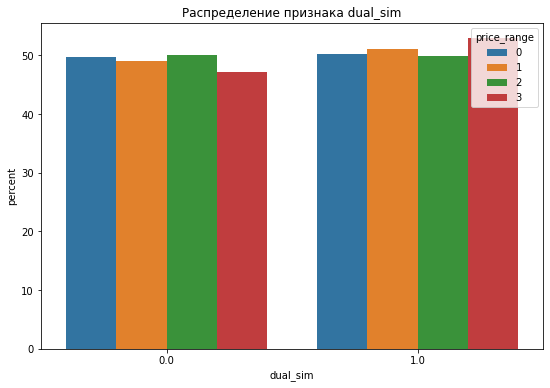

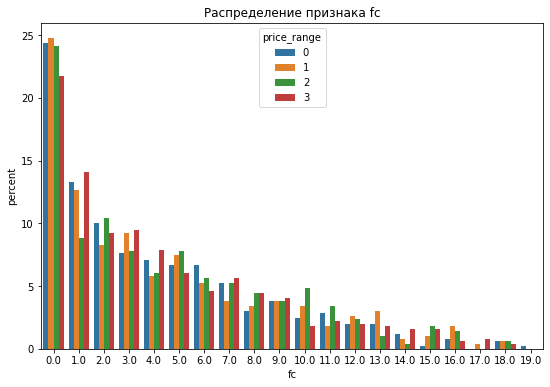

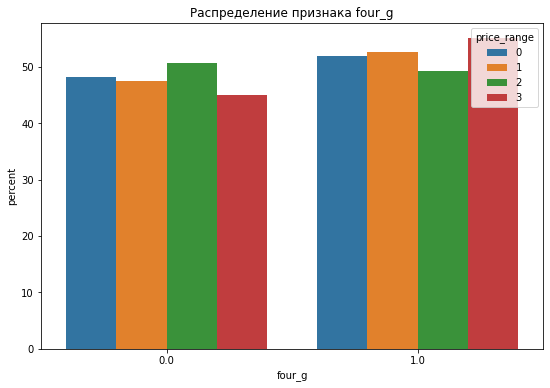

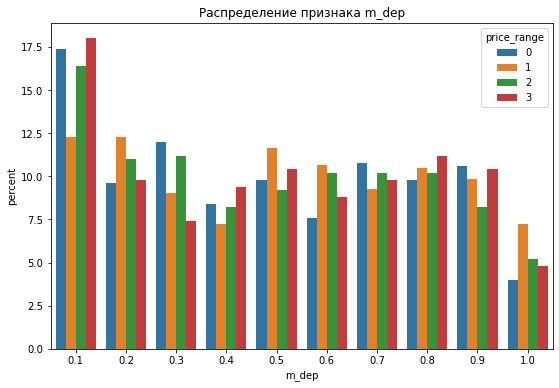

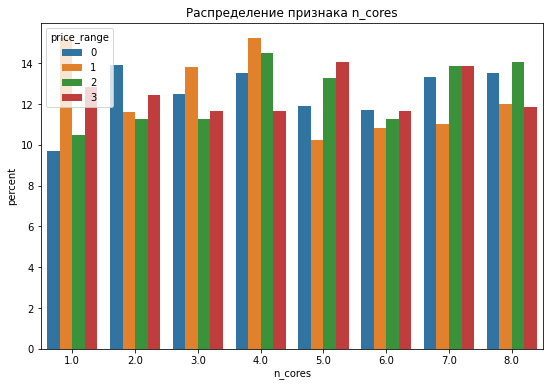

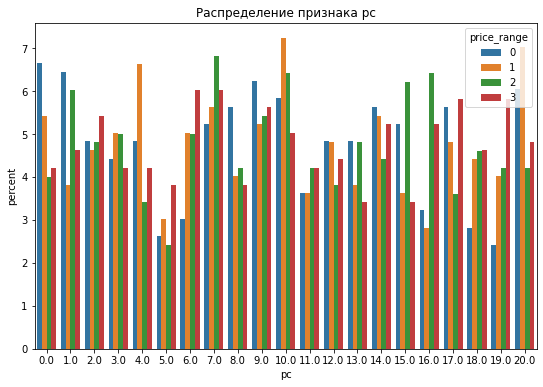

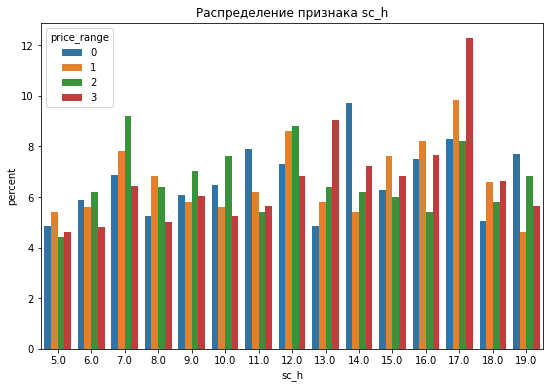

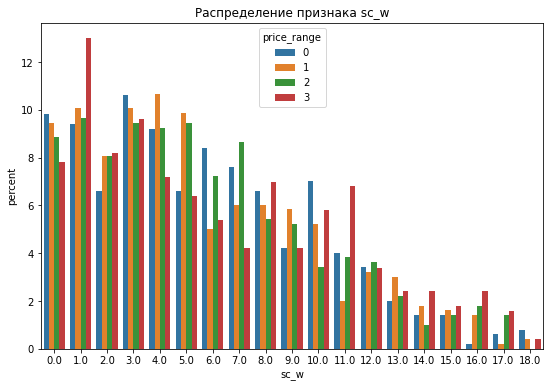

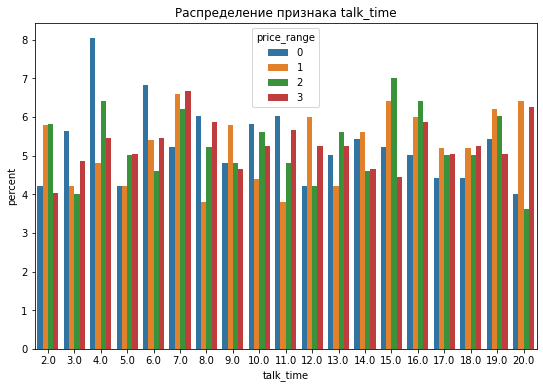

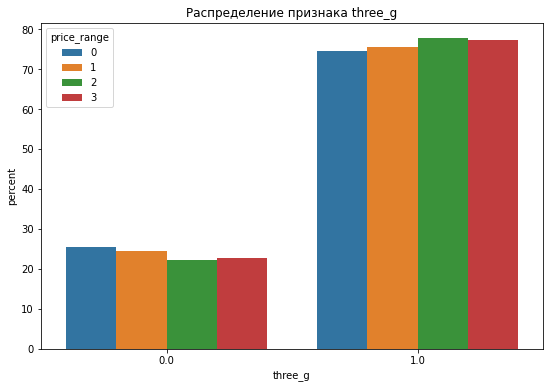

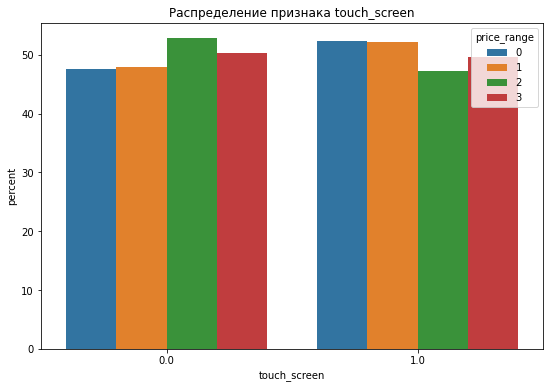

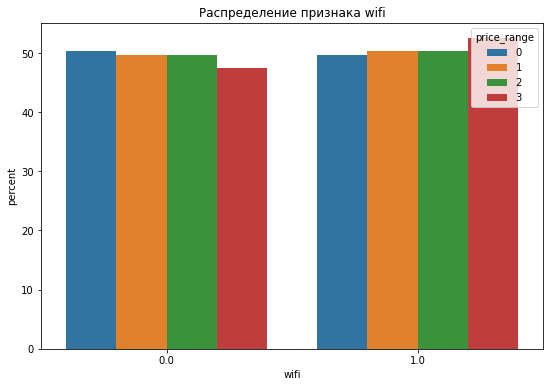

In [25]:
for col in ["blue","clock_speed","dual_sim", "fc", "four_g", "m_dep", "n_cores","pc", "sc_h", "sc_w", "talk_time", "three_g","touch_screen", "wifi"]:
    plt.figure(figsize=(9, 6))
    prop_df = dataset_with_errors[col].groupby(dataset_with_errors["price_range"]).value_counts(normalize=True).rename("percent").reset_index()
    prop_df["percent"] *= 100
    sns.barplot(x=col, y="percent", hue="price_range", data=prop_df)
    plt.title(f"Распределение признака {col}")

#### Построение корреляционной матрицы.

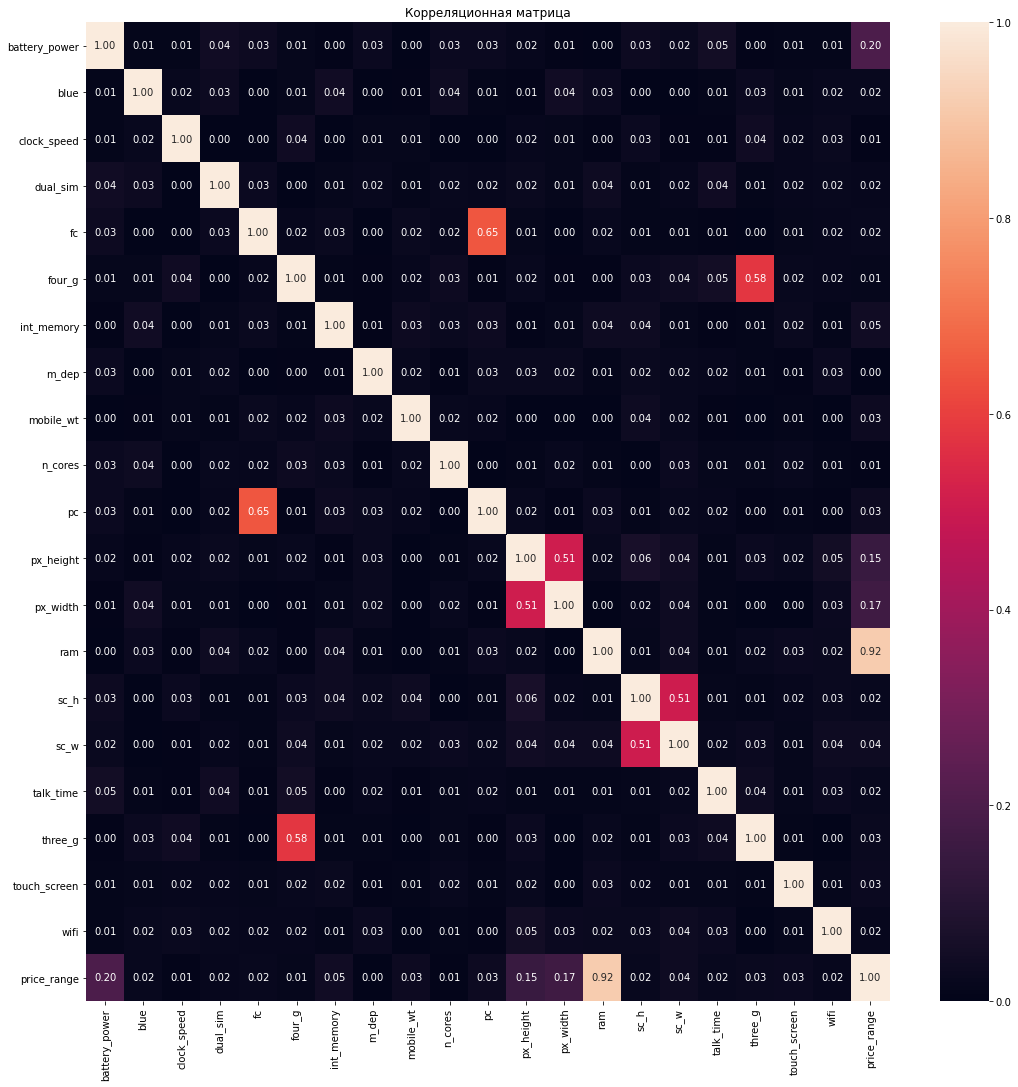

In [26]:
plt.figure(figsize=(18,18))
sns.heatmap(dataset_with_errors.corr().abs(), vmin=0, vmax=1, annot=True, fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

### 5. Провести подготовительную обработку данных, включающую следующие шаги:
1) удаление или заполнение отсутствующих значений;

2) приведение всех признаков к бинарной либо числовой шкале;

3) удаление несущественных либо избыточных признаков;

4) другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).


#### Заполняем NAN, в случае, если он есть, меняя на медиану числовые признаки
А если признаки бинарные, то меняем на моду

In [27]:
#среднее по столбцам
dataset_with_errors.median().astype(int)

battery_power    1225
blue                0
clock_speed         1
dual_sim            1
fc                  3
four_g              1
int_memory         32
m_dep               0
mobile_wt         141
n_cores             4
pc                 10
px_height         563
px_width         1248
ram              2147
sc_h               12
sc_w                5
talk_time          11
three_g             1
touch_screen        1
wifi                1
price_range         1
dtype: int32

In [28]:
if sum(dataset_with_errors.isnull().sum()) == 0:
    print("NAN в сломаном датасете отсутствуют")
else: 
    dataset_with_errors["battery_power"].fillna(dataset_with_errors["battery_power"].median(), inplace=True)
    dataset_with_errors["blue"].fillna(dataset_with_errors["blue"].mode()[0], inplace=True)
    dataset_with_errors["clock_speed"].fillna(dataset_with_errors["clock_speed"].median(), inplace=True)
    dataset_with_errors["dual_sim"].fillna(dataset_with_errors["dual_sim"].mode()[0], inplace=True)
    dataset_with_errors["fc"].fillna(dataset_with_errors["fc"].median(), inplace=True)
    dataset_with_errors["four_g"].fillna(dataset_with_errors["four_g"].mode()[0], inplace=True)
    dataset_with_errors["int_memory"].fillna(dataset_with_errors["int_memory"].median(), inplace=True)
    dataset_with_errors["m_dep"].fillna(dataset_with_errors["m_dep"].median(), inplace=True)
    dataset_with_errors["mobile_wt"].fillna(dataset_with_errors["mobile_wt"].median(), inplace=True)
    dataset_with_errors["n_cores"].fillna(dataset_with_errors["n_cores"].median(), inplace=True)
    dataset_with_errors["pc"].fillna(dataset_with_errors["pc"].median(), inplace=True)
    dataset_with_errors["px_height"].fillna(dataset_with_errors["px_height"].median(), inplace=True)
    dataset_with_errors["px_width"].fillna(dataset_with_errors["px_width"].median(), inplace=True)
    dataset_with_errors["ram"].fillna(dataset_with_errors["ram"].median(), inplace=True)
    dataset_with_errors["sc_h"].fillna(dataset_with_errors["sc_h"].median(), inplace=True)
    dataset_with_errors["sc_w"].fillna(dataset_with_errors["sc_w"].median(), inplace=True)
    dataset_with_errors["talk_time"].fillna(dataset_with_errors["talk_time"].median(), inplace=True)
    dataset_with_errors["three_g"].fillna(dataset_with_errors["three_g"].mode()[0], inplace=True)
    dataset_with_errors["touch_screen"].fillna(dataset_with_errors["touch_screen"].mode()[0], inplace=True)
    dataset_with_errors["wifi"].fillna(dataset_with_errors["wifi"].mode()[0], inplace=True)
    print("NAN в сломанном датасете изменены медиану или моду!")

NAN в сломанном датасете изменены медиану или моду!


Показываем, что теперь нет больше NAN

In [29]:
dataset_with_errors.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [30]:
dataset_with_errors

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,2.2,0.0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,0.5,1.0,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,0.5,1.0,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,2.5,0.0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,1.2,0.0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,0.5,1.0,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,1.0,1.0,0.0,0
1996,1965.0,1.0,2.6,1.0,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,1.0,1.0,1.0,2
1997,1911.0,0.0,0.9,1.0,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,1.0,1.0,0.0,3
1998,1512.0,0.0,0.9,0.0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,1.0,1.0,1.0,0


#### Приведение всех признаков к бинарной либо числовой шкале;

-- В данном датасете и так все признаки числовые.

#### Удаление несущественных либо избыточных признаков

Показываем названия столбцов

In [31]:
dataset_with_errors.columns.to_list()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

Я считаю избыточными признаки: fc, pc, sc_h, sc_w, m_dep,clock_speed - удалим их

In [32]:
new_dataset = dataset_with_errors.drop(['fc', 'pc', "sc_h", "sc_w", "m_dep", "clock_speed"], axis = 1)
new_dataset

,battery_power,blue,dual_sim,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,0.0,0.0,7.0,188.0,2.0,20.0,756.0,2549.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,1.0,1.0,53.0,136.0,3.0,905.0,1988.0,2631.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,1.0,1.0,41.0,145.0,5.0,1263.0,1716.0,2603.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,0.0,0.0,10.0,131.0,6.0,1216.0,1786.0,2769.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,0.0,1.0,44.0,141.0,2.0,1208.0,1212.0,1411.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,1.0,1.0,2.0,106.0,6.0,1222.0,1890.0,668.0,19.0,1.0,1.0,0.0,0
1996,1965.0,1.0,1.0,0.0,39.0,187.0,4.0,915.0,1965.0,2032.0,16.0,1.0,1.0,1.0,2
1997,1911.0,0.0,1.0,1.0,36.0,108.0,8.0,868.0,1632.0,3057.0,5.0,1.0,1.0,0.0,3
1998,1512.0,0.0,0.0,1.0,46.0,145.0,5.0,336.0,670.0,869.0,19.0,1.0,1.0,1.0,0


#### Другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).

Проверка аномалий

<AxesSubplot:>

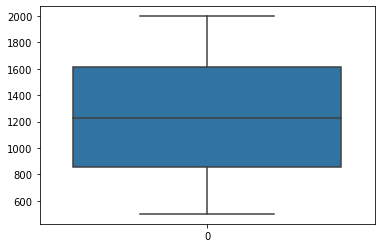

In [33]:
sns.boxplot(data=new_dataset["battery_power"])

Аномалий нет

<AxesSubplot:>

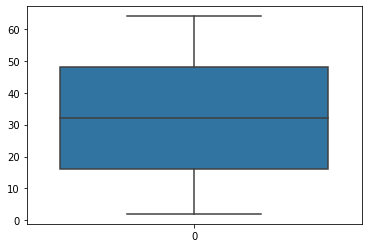

In [34]:
sns.boxplot(data=new_dataset["int_memory"])

Видим, аномалий нет

<AxesSubplot:>

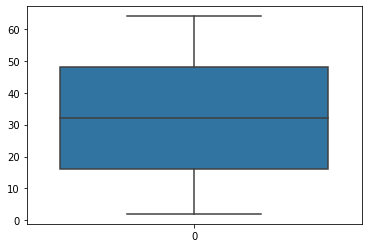

In [35]:
sns.boxplot(data=new_dataset["int_memory"])

Аномалий нет

<AxesSubplot:>

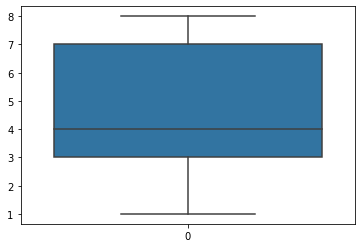

In [36]:
sns.boxplot(data=new_dataset["n_cores"])

Видим, что аномалий нет

<AxesSubplot:>

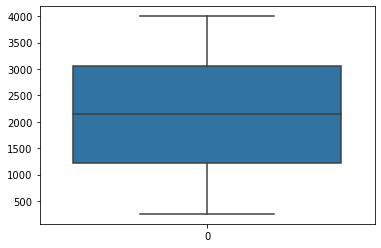

In [37]:
sns.boxplot(data=new_dataset["ram"])

Аномалий нет

## Дополнительные задания
1) Использовать несколько моделей машинного обучения для решения поставленной задачи.

2) Использовать методику замеры времени обучения каждой использованной модели.

3) Сформировать сводную таблицу результатов обучения, включающую следующие данные:
    
    3.1) время обучения модели;
    
    3.2) accuracy;
    
    3.3) precision;
    
    3.4) recall;
    
    3.5) f1-score.


In [38]:
new_dataset

,battery_power,blue,dual_sim,four_g,int_memory,mobile_wt,n_cores,px_height,px_width,ram,talk_time,three_g,touch_screen,wifi,price_range
0,842.0,0.0,0.0,0.0,7.0,188.0,2.0,20.0,756.0,2549.0,19.0,0.0,0.0,1.0,1
1,1021.0,1.0,1.0,1.0,53.0,136.0,3.0,905.0,1988.0,2631.0,7.0,1.0,1.0,0.0,2
2,563.0,1.0,1.0,1.0,41.0,145.0,5.0,1263.0,1716.0,2603.0,9.0,1.0,1.0,0.0,2
3,615.0,1.0,0.0,0.0,10.0,131.0,6.0,1216.0,1786.0,2769.0,11.0,1.0,0.0,0.0,2
4,1821.0,1.0,0.0,1.0,44.0,141.0,2.0,1208.0,1212.0,1411.0,15.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,1.0,1.0,1.0,2.0,106.0,6.0,1222.0,1890.0,668.0,19.0,1.0,1.0,0.0,0
1996,1965.0,1.0,1.0,0.0,39.0,187.0,4.0,915.0,1965.0,2032.0,16.0,1.0,1.0,1.0,2
1997,1911.0,0.0,1.0,1.0,36.0,108.0,8.0,868.0,1632.0,3057.0,5.0,1.0,1.0,0.0,3
1998,1512.0,0.0,0.0,1.0,46.0,145.0,5.0,336.0,670.0,869.0,19.0,1.0,1.0,1.0,0


Проверяем, что NAN не содержится в датасете

In [39]:
new_dataset.isnull().sum()

battery_power    0
blue             0
dual_sim         0
four_g           0
int_memory       0
mobile_wt        0
n_cores          0
px_height        0
px_width         0
ram              0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

Делим все наблюдения на обучающую и тестовую выборки в соотношении 80-20.

In [40]:
X = new_dataset.drop('price_range', axis=1).values
Y = new_dataset[['price_range']].values

X

array([[8.420e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.000e+00],
       [1.021e+03, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [5.630e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.911e+03, 0.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        0.000e+00],
       [1.512e+03, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [41]:
Y

array([[1],
       [2],
       [2],
       ...,
       [3],
       [0],
       [3]], dtype=int64)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify = Y)

Размерности обучающей и тестовой выборки.

In [43]:
X_train.shape, y_train.shape

((1600, 14), (1600, 1))

In [44]:
X_test.shape, y_test.shape

((400, 14), (400, 1))

#### Функция для отображения матрицы ошибок

In [45]:
def getConfusionMatrix(y_pred):
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]

    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]

    labels = np.asarray(labels).reshape(4,4)

    ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap="YlGnBu")

    ax.set_title('Матрица ошибок')
    
    ax.set_xlabel('\nПредсказанные значения')
    
    ax.set_ylabel('Реальные значения ')
    
    ax.xaxis.set_ticklabels([0,1,2,3])
    
    ax.yaxis.set_ticklabels([0,1,2,3])

#### Функция для отображения метрик: 
1) accuracy;

2) precision;

3) recall;

4) f1-score.

5) MSE

In [59]:
def getAllMetrics(y_pred):
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    
    print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
    
    print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')
    
    print(f'F1: {f1_score(y_test, y_pred, average="micro")}')
    
    print(f'Mean squared error: {mean_squared_error(y_test, y_pred)}')

### Метод опорных векторов

In [70]:
%%time 
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
y_pred_SVC_prediction = SVC_model.predict(X_test)
getAllMetrics(y_pred_SVC_prediction)

Accuracy: 0.925
Precision: 0.925
Recall: 0.925
F1: 0.925
Mean squared error: 0.09
Wall time: 28.9 ms


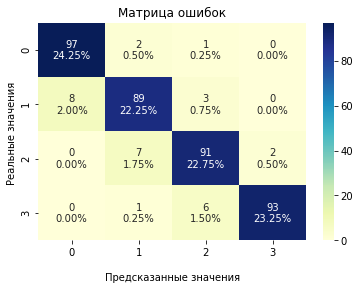

In [71]:
getConfusionMatrix(y_pred_SVC_prediction)

### Дерево решений

In [72]:
%%time 
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
y_pred_tree_prediction = tree_model.predict(X_test)
getAllMetrics(y_pred_tree_prediction)

Accuracy: 0.7875
Precision: 0.7875
Recall: 0.7875
F1: 0.7875
Mean squared error: 0.2275
Wall time: 11 ms


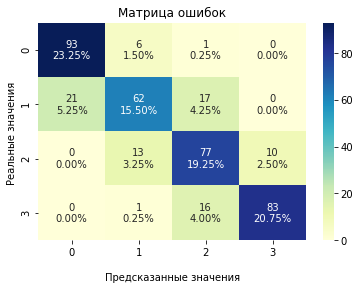

In [73]:
getConfusionMatrix(y_pred_tree_prediction)

### Модель логистической регрессии

In [74]:
%%time 
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg_prediction = logreg_model.predict(X_test)
getAllMetrics(y_pred_logreg_prediction)

Accuracy: 0.6225
Precision: 0.6225
Recall: 0.6225
F1: 0.6225
Mean squared error: 0.43
Wall time: 72.8 ms


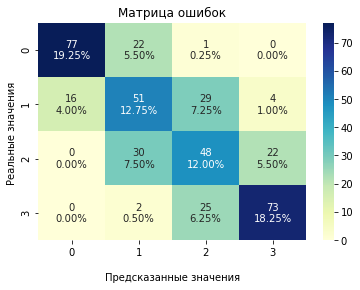

In [67]:
getConfusionMatrix(y_pred_logreg_prediction)

### Метод K-ближайщих соседей

In [68]:
%%time 
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train)
y_pred_KNN_prediction = KNN_model.predict(X_test)
getAllMetrics(y_pred_KNN_prediction)

Accuracy: 0.8875
Precision: 0.8875
Recall: 0.8875
F1: 0.8875
Mean squared error: 0.1275
Wall time: 19.9 ms


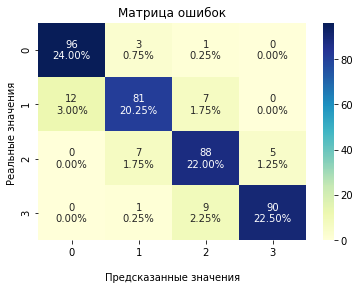

In [69]:
getConfusionMatrix(y_pred_KNN_prediction)

## Итоговый вывод:
##### Самая качественная модель по метрике F1 и Accuracy - Метод опорных векторов (SVC): 
1) F1 = 0.945

2) Accuracy = 0.945